#### NN Interpretability and Transparency

In [1]:
import torch
import torchvision.models as models
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#### Neuron Activation viewing as Heatmap

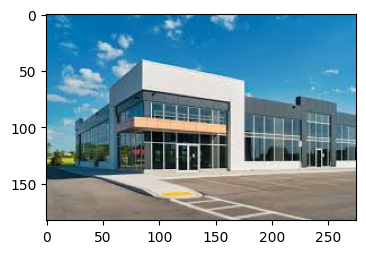

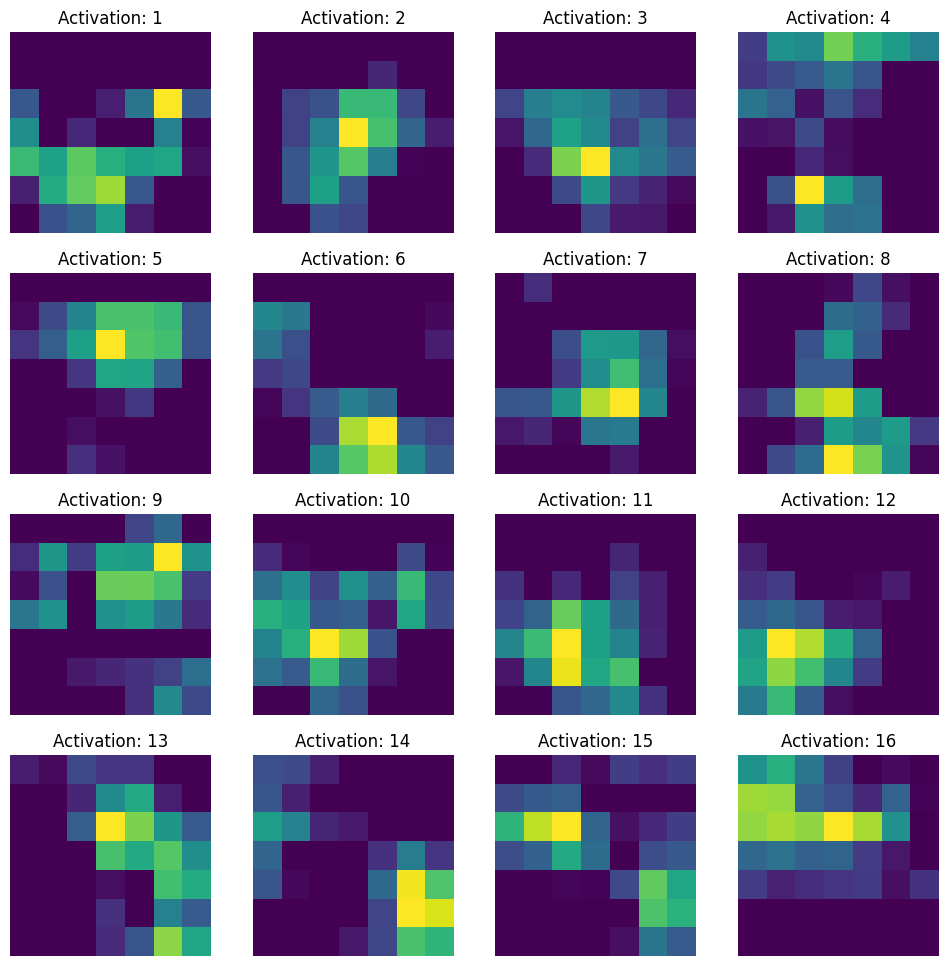

In [6]:
# Load a pre-trained model (e.g., ResNet18)
model = models.resnet18(pretrained=True)

# Choose an input image
img_path = 'building.jpg'
img = Image.open(img_path)

# Display actual image
plt.figure(figsize=(4,4))
plt.imshow(img)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# Select a layer to visualize
layer_name = 'layer4'  # Example: a convolutional layer
layer = getattr(model, layer_name)

# Create a hook to capture the activations
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

layer.register_forward_hook(get_activation(layer_name))

# Pass the image through the model
with torch.no_grad():
    output = model(input_batch)

# Get the activations
activations = activation[layer_name]

# Visualize the activations
# (This will display a grid of filter activations)
n_filters = activations.shape[1]
plt.figure(figsize=(12, 12))

for i in range(16):
    plt.subplot(4, 4, i+1)  # Display 16 of the 512 activations
    plt.imshow(activations[0, i, :, :].numpy(), cmap='viridis')
    plt.title(f'Activation: {i+1}')
    plt.axis('off')
    if i > 63:
        break
plt.show()

In [3]:
activations.shape[1]

512